# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

## Importing the dataset

In [ ]:
dataset = pd.read_csv('data weight.csv', delimiter=';')
dataset

,1,2,3,4,5,6,7,8,9,10
0,99,55,88,46,25,39,11,28,30,58
1,67,9,52,48,26,3,56,53,27,21
2,63,0,28,36,90,0,37,40,16,17
3,36,44,64,45,74,19,54,10,8,53
4,63,26,87,10,54,13,55,11,31,90
...,...,...,...,...,...,...,...,...,...,...
9995,27,54,33,35,19,20,44,11,0,94
9996,94,9,86,15,7,36,44,39,30,92
9997,12,21,88,2,26,0,38,64,7,59
9998,56,36,24,46,84,23,23,2,26,95


## Implementing Thompson Sampling

In [ ]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

In [ ]:
ads_selected_np = np.array(ads_selected)
np.savetxt('thompson_sampling_ex_4.csv', ads_selected_np)

## Visualising the results - Histogram

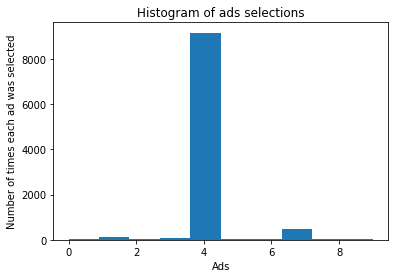

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()